# Lending Club Case Study

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
loan_data = pd.read_csv("loan.csv", dtype={'last_pymnt_amnt': float}, low_memory=False)

In [100]:
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


## Checking for null values in the dataset and drop

In [101]:
loan_data.shape

(39717, 111)

In [102]:
loan_data.isna().sum().sort_values(ascending=False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

In [103]:
loan_data.dropna(axis = 1, how = 'all', inplace = True)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [77]:
loan_data.shape

(39717, 59)

## Outlier Treatment

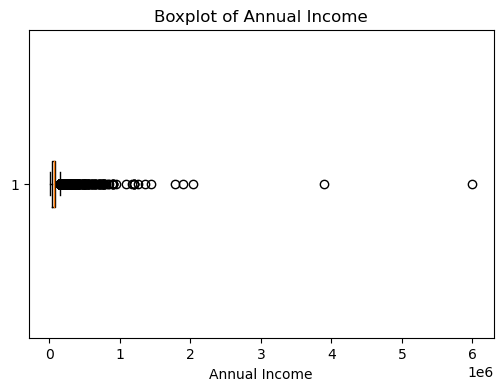

In [104]:
plt.figure(figsize=(6, 4))
plt.boxplot(loan_data['annual_inc'], vert=False)

# Customize the plot
plt.xlabel('Annual Income')
plt.title('Boxplot of Annual Income')

# Show the plot
plt.show()


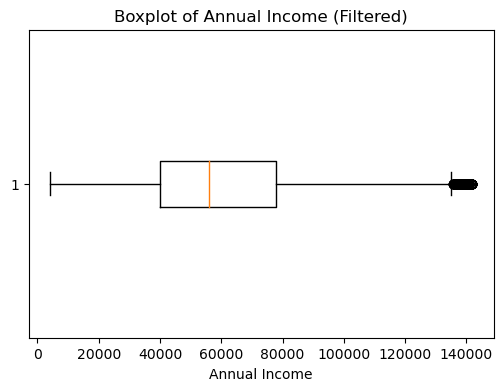

In [105]:
# Calculate the 95th percentile of annual_inc
per_95_annual_inc = loan_data['annual_inc'].quantile(0.95)

# Filter the loan_data based on the 95th percentile of annual_inc
loan_data_filtered = loan_data[loan_data['annual_inc'] <= per_95_annual_inc]

# Create a box plot of the filtered annual_inc data
plt.figure(figsize=(6, 4))
plt.boxplot(loan_data_filtered['annual_inc'], vert=False)

# Customize the plot
plt.xlabel('Annual Income')
plt.title('Boxplot of Annual Income (Filtered)')

# Show the plot
plt.show()

## The values after 95 percentile seems to be disconected from the general distribution and also there is huge increase in the value for small quantile variation. So, considering threshold for removing outliers as 0.95 and removed outliers from annual income column

## Univariate Analysis: Visualizing distributions of key variables

## Loan Status Distribution

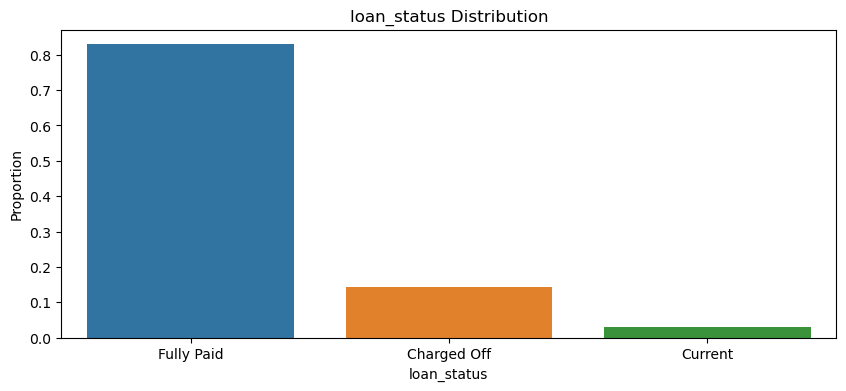

In [108]:
plt.figure(figsize=(10,4))
var = 'loan_status'
#Probability / Percentage of each values
prob_df = loan_data[var].value_counts(normalize=True).reset_index()
prob_df.columns = ['index',var]
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

## Observation: 85% of borrowers has paid the loan fully ,14% are defaulted the loan and 5% were paying loan currently

### Frequency distribution of Loans by State

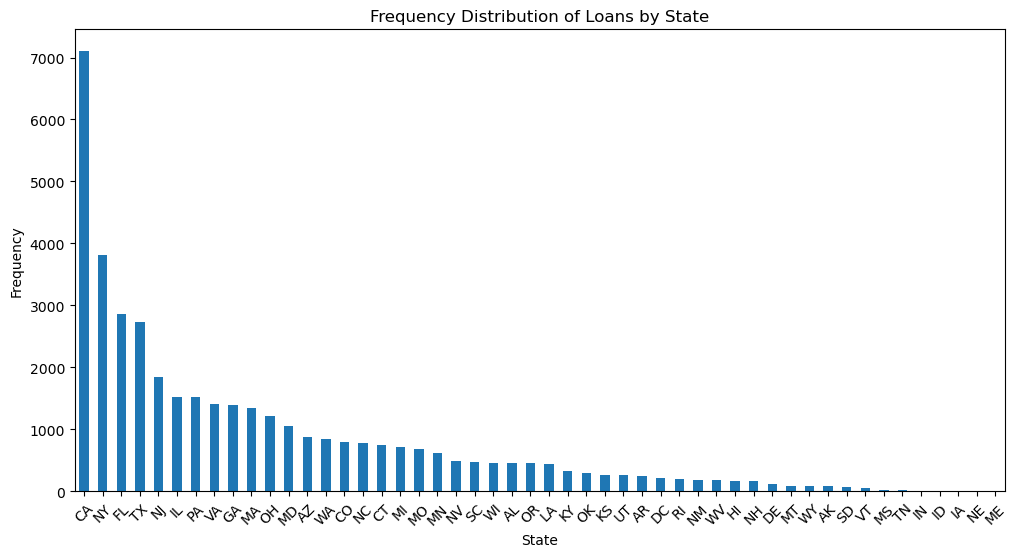

In [109]:
# Calculate frequency distribution
state_counts = loan_data['addr_state'].value_counts()

# Plotting
plt.figure(figsize=(12, 6))
state_counts.plot(kind='bar')
plt.title('Frequency Distribution of Loans by State')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

## Observation: CA state has the maximum amount of loan applications

### Frequency distribution of Loan Terms

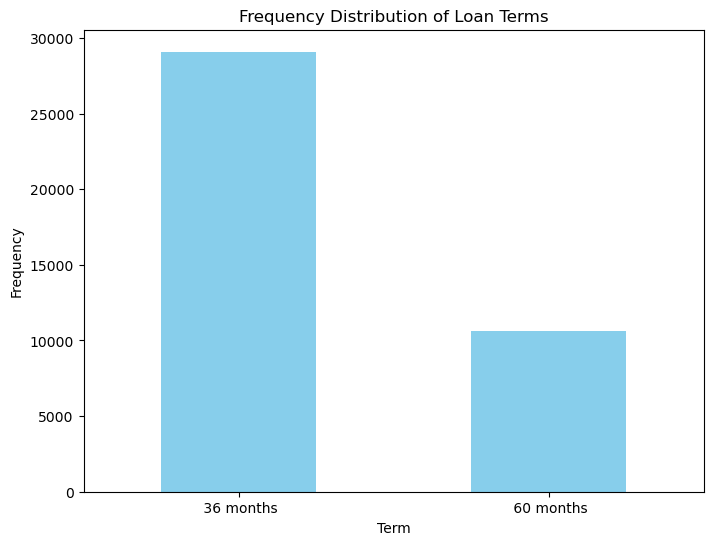

In [110]:

# Calculate frequency distribution
term_counts = loan_data['term'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
term_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency Distribution of Loan Terms')
plt.xlabel('Term')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()


## Observation : Majority of the loan applications counts are in the term of 36 months.

### Loan Purpose distribution

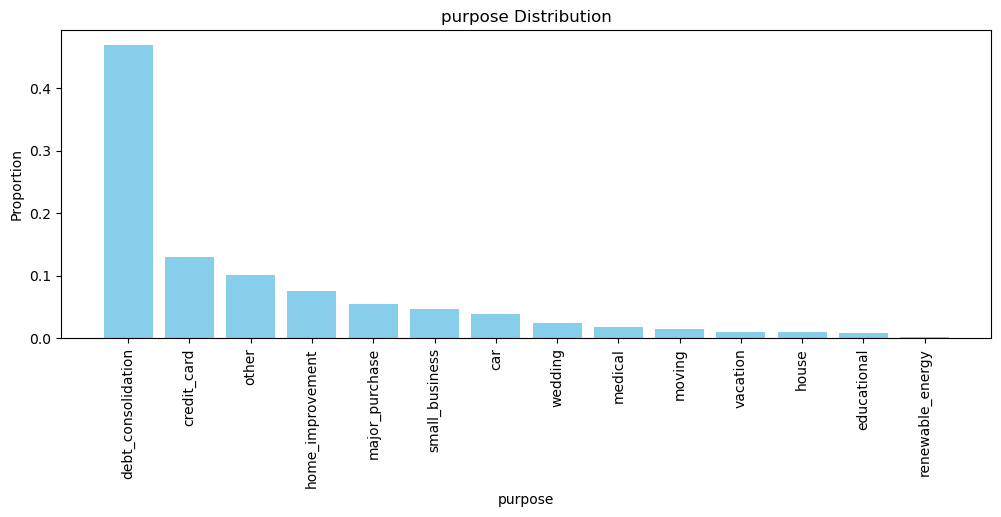

In [111]:
plt.figure(figsize=(12, 4))

var = 'purpose'

# Percentage of each value
prob_df = loan_data[var].value_counts(normalize=True).reset_index()
prob_df.columns = ['index', var]  # Rename columns

plt.bar(prob_df['index'], prob_df[var], color='skyblue')
plt.xlabel(var)
plt.xticks(rotation=90)
plt.ylabel('Proportion')
plt.title(var + ' Distribution')

plt.show()



## Observation: More number of people took loan for debt consolidation and a very few people took for renewable energy

## Bivariate Analysis: Relationship between loan status and other variables

## Relationship between Grade and Loan Status

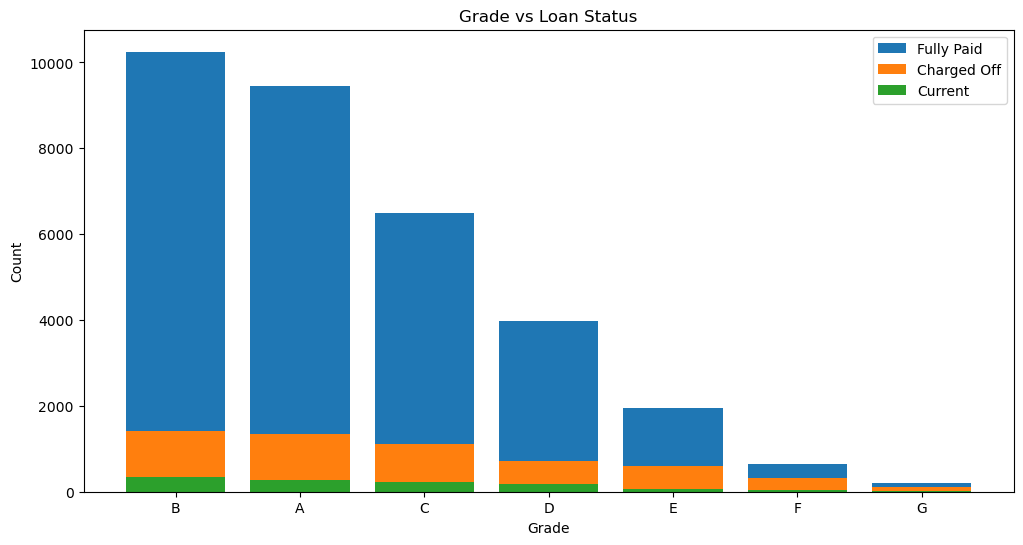

In [112]:
# Count occurrences of each value in 'grade' column
grade_counts = loan_data['grade'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
for loan_status in loan_data['loan_status'].unique():
    plt.bar(grade_counts.index, loan_data[loan_data['loan_status'] == loan_status]['grade'].value_counts(), label=loan_status)

plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Grade vs Loan Status')
plt.legend()
plt.show()


## Observation: The loan applicants belonging to Grades B, A, C and D contribute to most number of "Charged Off" loans

### Relationship between loan status and loan amount

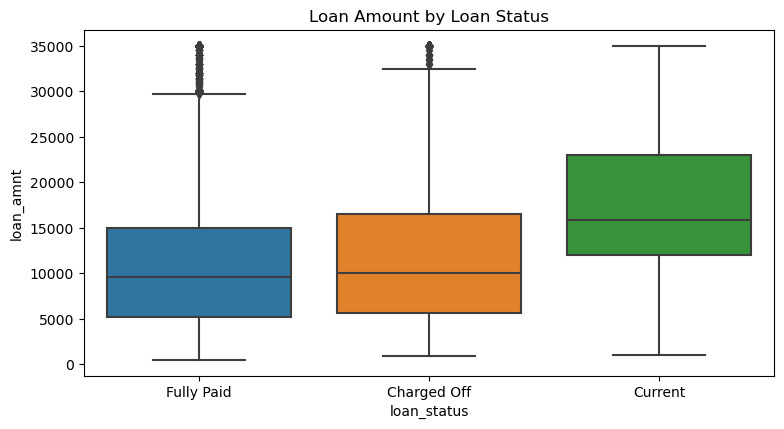

In [113]:
plt.figure(figsize=(15, 8))


plt.subplot(2, 2, 1)
sns.boxplot(data=loan_data, x='loan_status', y='loan_amnt')
plt.title('Loan Amount by Loan Status')



plt.tight_layout()
plt.show()

## Observation: Charged Off loans have higher loan amounts than Fully Paid ones.



### Relationship between loan status and annual income

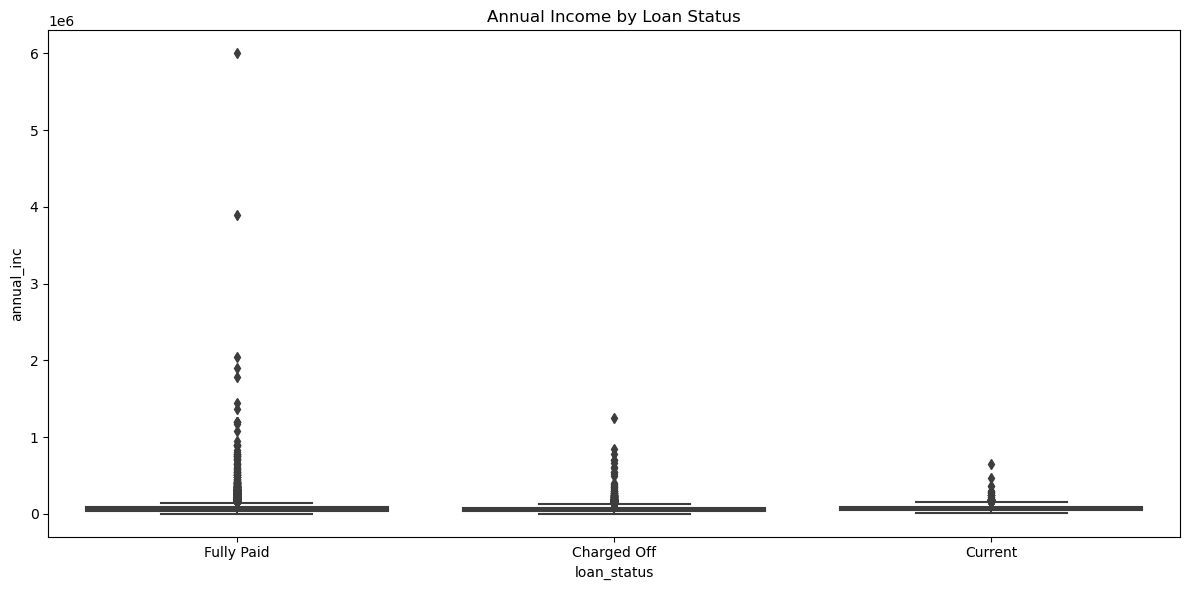

In [88]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=loan_data, x='loan_status', y='annual_inc')
plt.title('Annual Income by Loan Status')

plt.tight_layout()
plt.show()

## Observation: Charged Off loans have lower annual income than Fully Paid ones.


### Bivariate analysis between loan_status and term

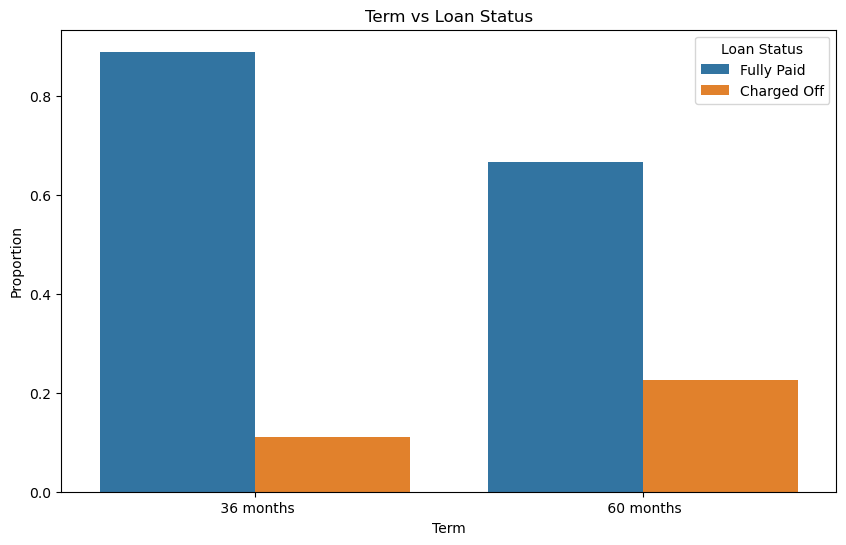

In [115]:
# Proportion of values for each category
df = loan_data.groupby(['term', 'loan_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('term')['id'].transform(lambda x: x / x.sum())

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='term', y='proportion', hue='loan_status', data=df, hue_order=['Fully Paid', 'Charged Off'])
plt.title('Term vs Loan Status')
plt.xlabel('Term')
plt.ylabel('Proportion')
plt.legend(title='Loan Status')
plt.show()


## Observation: There are more proportion of borrowers defaulted loan in 60 months term then 36 months. Also the Fully Paid rate is higher in 36 months tenure.



### Bivariate analysis between loan_status and home_ownership

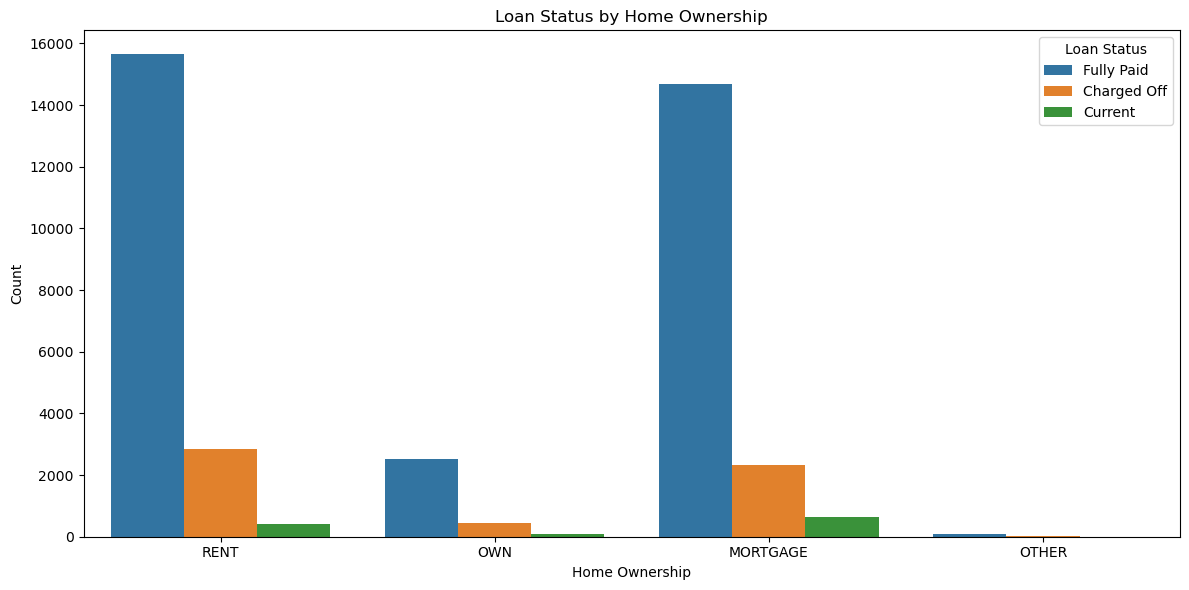

In [116]:
#replacing 'NONE' with 'OTHERS'
loan_data['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)
plt.figure(figsize=(12, 6))
sns.countplot(data=loan_data, x='home_ownership', hue='loan_status')
plt.title('Loan Status by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.legend(title='Loan Status')

plt.tight_layout()
plt.show()

## Observation: Overall highest Charge Off numbers are in the category of RENT and MORTGAGE

### Bivariate analysis between loan_status and verification_status

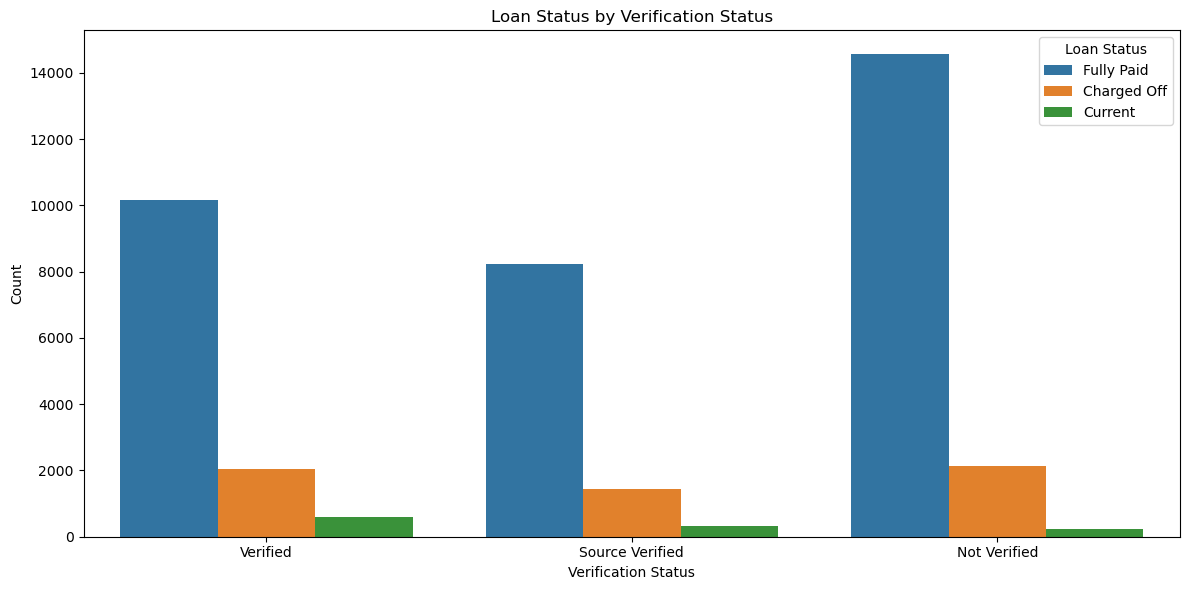

In [117]:

plt.figure(figsize=(12, 6))
sns.countplot(data=loan_data, x='verification_status', hue='loan_status')
plt.title('Loan Status by Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.legend(title='Loan Status')

plt.tight_layout()
plt.show()

## Observation: Majority of loans were given without verification of applicants income.

### Bivariate analysis between Employment Length and Loan Amount


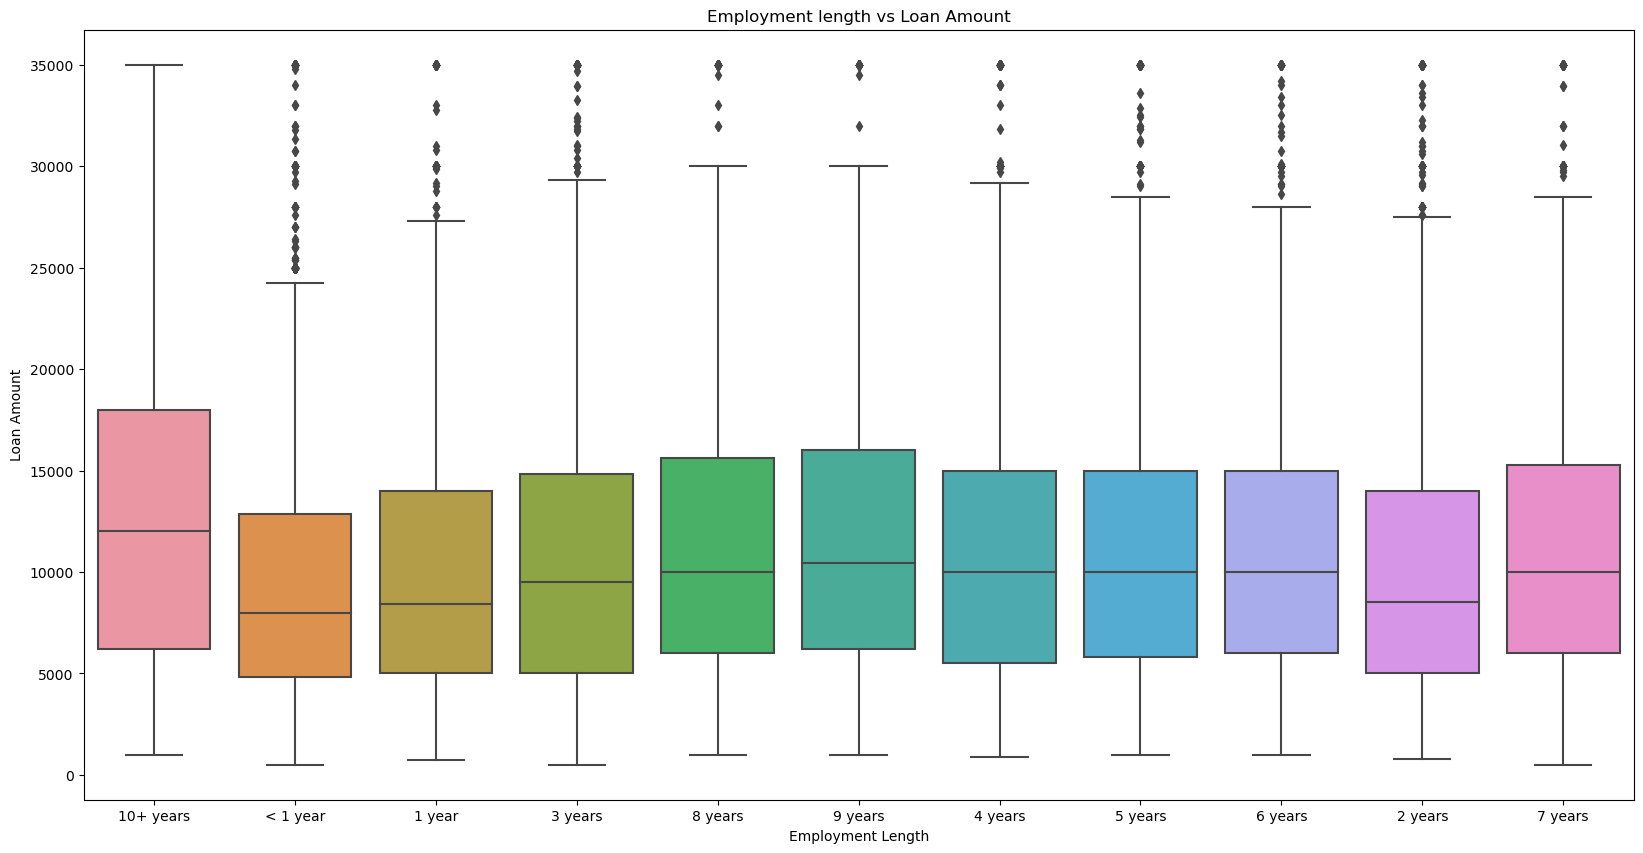

In [118]:
plt.figure(figsize=(20,10))
sns.boxplot(x='emp_length', y=loan_data.loan_amnt, data=loan_data)
plt.title('Employment length vs Loan Amount')
plt.xlabel('Employment Length')
plt.ylabel('Loan Amount')
plt.show()

## Observation: More borrowers are from 10+ years and least is <1 year

### Bivariate analysis between loan_status and purpose of loan


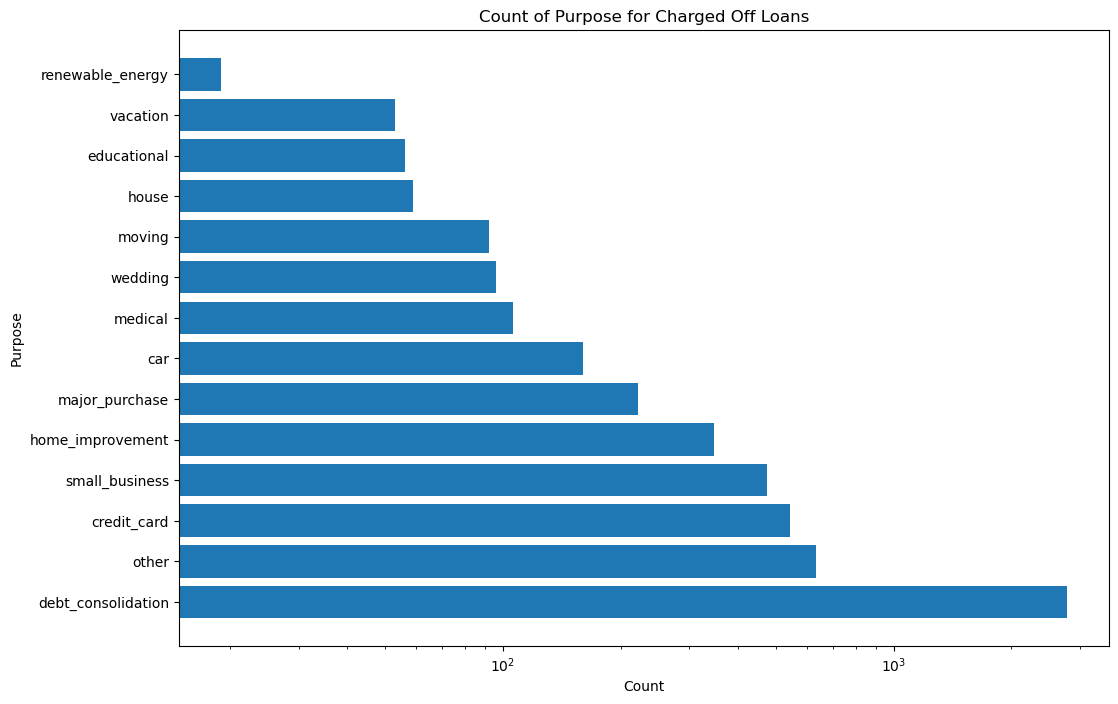

In [119]:

# Filter the loan_data for 'Charged Off' loan status
charged_off_data = loan_data[loan_data['loan_status'] == 'Charged Off']

# Create a countplot using Matplotlib
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xscale('log')  # Set x-axis scale to logarithmic

# Count occurrences of each value in the 'purpose' column and plot
ax.barh(charged_off_data['purpose'].value_counts().index, charged_off_data['purpose'].value_counts())

# Customize the plot
ax.set_xlabel('Count')
ax.set_ylabel('Purpose')
ax.set_title('Count of Purpose for Charged Off Loans')

# Show the plot
plt.show()


## Observation: The likelihood of loans being charged off (defaulted - not repaid) is higher when the purpose of the loan is 'debt consolidation'.

## Business Driven Metrics

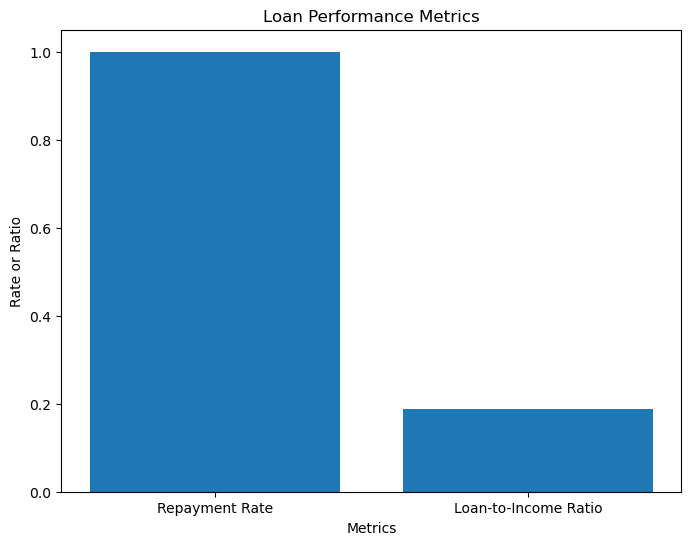

In [120]:

# Calculate repayment rate, and loan-to-income ratio

loan_to_income_ratio = loan_data['loan_amnt'] / loan_data['annual_inc']

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Repayment Rate', 'Loan-to-Income Ratio'], [repayment_rate, loan_to_income_ratio.mean()])
plt.title('Loan Performance Metrics')
plt.ylabel('Rate or Ratio')
plt.xlabel('Metrics')
plt.show()


## Observation: Most people repay their debts on time, and their debt levels are achievable in relation to their income.


## Type Driven Metrics

In [121]:
# Descriptive Statistics
loan_data.describe()

# Frequency Distribution
categorical_columns = ['grade', 'sub_grade', 'home_ownership', 'verification_status']
for column in categorical_columns:
    print(loan_data[column].value_counts())

grade
B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: count, dtype: int64
sub_grade
B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
C1    2136
B2    2057
C2    2011
B1    1830
A3    1810
C3    1529
A2    1508
D2    1348
C4    1236
C5    1186
D3    1173
A1    1139
D4     981
D1     931
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2      78
G4      56
G3      48
G5      30
Name: count, dtype: int64
home_ownership
RENT        18899
MORTGAGE    17659
OWN          3058
OTHER         101
Name: count, dtype: int64
verification_status
Not Verified       16921
Verified           12809
Source Verified     9987
Name: count, dtype: int64


## Data driven Metrics

In [122]:

# Debt-to-Income Ratio
loan_data['debt_to_income_ratio'] = loan_data['installment'] / loan_data['annual_inc']

# Payment-to-Income Ratio
loan_data['payment_to_income_ratio'] = loan_data['installment'] / (loan_data['annual_inc'] / 12)

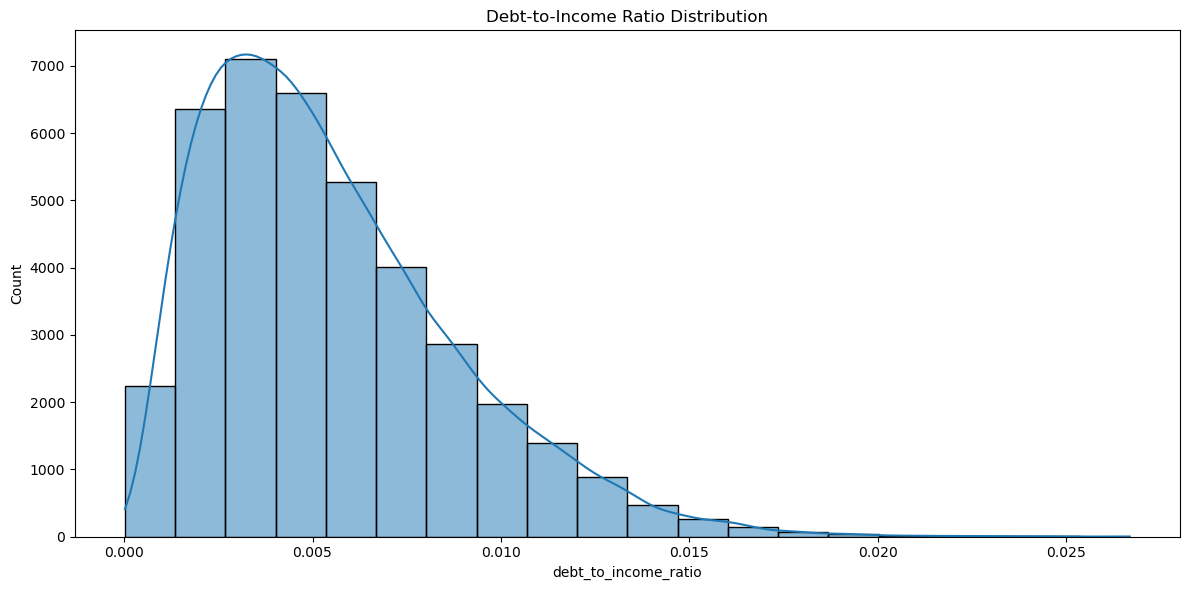

In [123]:
# Plotting the distributions of derived ratios
plt.figure(figsize=(12, 6))

# Debt-to-Income Ratio

sns.histplot(loan_data['debt_to_income_ratio'], bins=20, kde=True)
plt.title('Debt-to-Income Ratio Distribution')


plt.tight_layout()
plt.show()


## Segmentation

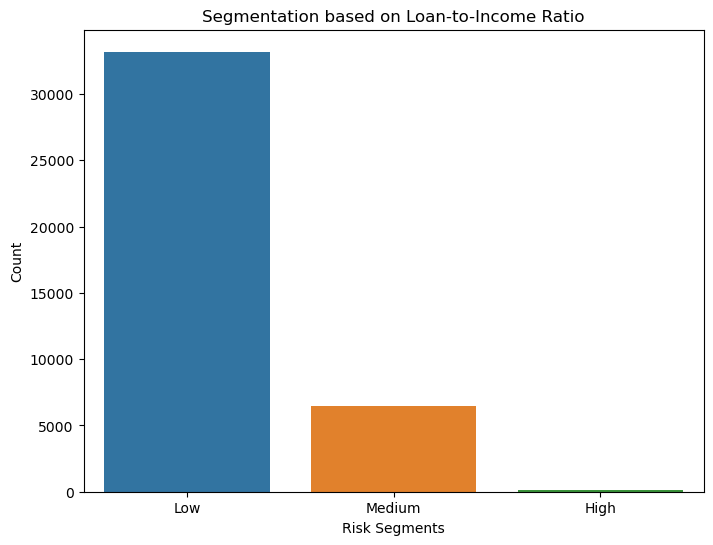

In [43]:
# Loan-to-Income Ratio
loan_data['loan_to_income_ratio'] = loan_data['loan_amnt'] / loan_data['annual_inc']
risk_segments = pd.cut(loan_data['loan_to_income_ratio'], bins=[0, 0.3, 0.6, float('inf')], labels=['Low', 'Medium', 'High'])

plt.figure(figsize=(8, 6))
sns.countplot(x=risk_segments)
plt.title('Segmentation based on Loan-to-Income Ratio')
plt.xlabel('Risk Segments')
plt.ylabel('Count')
plt.show()

## Observation: Higher loan amount relative to their annual income, which may pose a higher risk of default